Regresión Logística

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
training_dataframe = pd.read_csv("train.csv")

In [3]:
training_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_dataframe.isnull() #Ver los valores nulos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

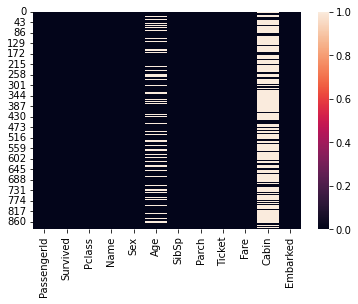

In [5]:
sns.heatmap(training_dataframe.isnull()) #Crear un heatmap de los valores nulos, color blanco son datos nulos

<AxesSubplot:xlabel='Survived', ylabel='count'>

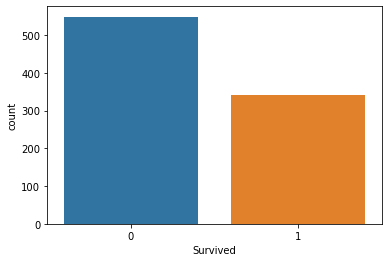

In [6]:
sns.countplot(x="Survived", data=training_dataframe) #Contar el número de supervivientes

<AxesSubplot:xlabel='Survived', ylabel='count'>

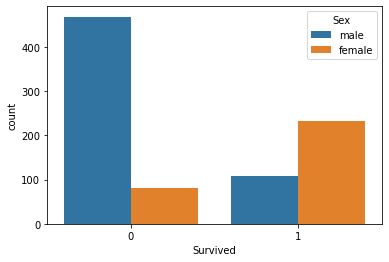

In [7]:
sns.countplot(x="Survived", data=training_dataframe, hue="Sex") #Divide la gráfica según el sexo

<AxesSubplot:xlabel='Survived', ylabel='count'>

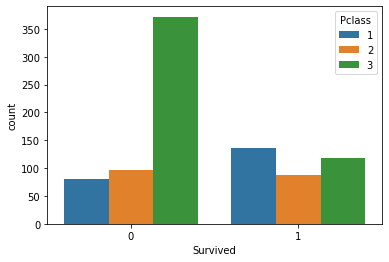

In [8]:
sns.countplot(x="Survived", data=training_dataframe, hue="Pclass")

C:\Users\erick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

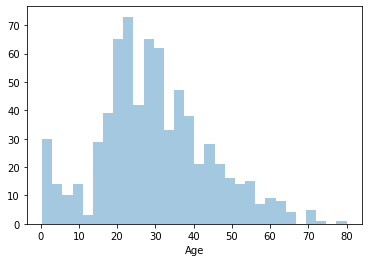

In [9]:
sns.distplot(training_dataframe["Age"].dropna(), kde=False, bins=30)  #dropna no colocar las columnas que no tienen edad, kde=False que la parte curva no la ponga, bins el número de columnas que va a tener

<AxesSubplot:ylabel='Frequency'>

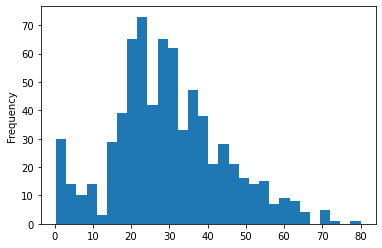

In [10]:
training_dataframe["Age"].plot.hist(bins=30) #Crear un gráfico similar al anterior

<AxesSubplot:ylabel='Frequency'>

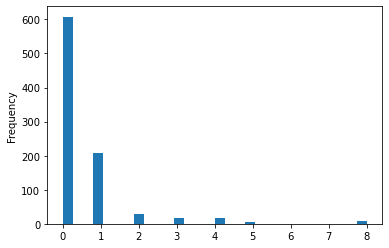

In [11]:
 training_dataframe["SibSp"].plot.hist(bins=30) #Saber el número de familiares que tenía cada pasajero

Mostra las mismas gráficas por medio de cufflinks

In [12]:
import cufflinks as cf

In [13]:
cf.go_offline() #Configuración para poder utilizarse online

In [14]:
training_dataframe['Fare'].iplot(kind='hist', bins=40)

Cambiar los valores nulos por los valores medios

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

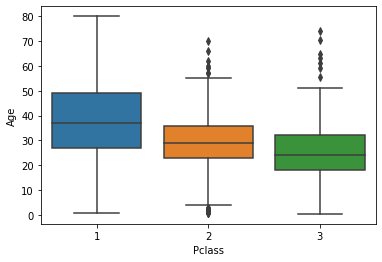

In [15]:
sns.boxplot(x="Pclass", y="Age", data=training_dataframe) #Crear un diagrama de caja para calcular la edad media

In [16]:
#Función para rellenar los valores nulos con los valores
def average_age(columns):
    age = columns[0]
    class_ = columns[1] #Columna de clase de alojamiento
    #Verificar si el valor es nulo
    if pd.isnull(age):
        if class_ == 1:
            return 38 #Edad media de la clase 1 del diagrama de caja
        elif class_ == 2:
            return 30
        else:
            return 25
    else:
        return age

In [17]:
#Aplicar la función de average_age
#Seleccionar las 2 columnas del dataframe (Age, Pclass), se le aplica la función de edad media y se le pasa axis = 1 para decirle que se aplique sobre las columnas
training_dataframe['Age'] = training_dataframe[['Age','Pclass']].apply(average_age, axis=1)

<AxesSubplot:>

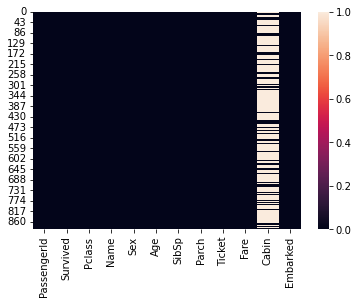

In [18]:
sns.heatmap(training_dataframe.isnull())

In [19]:
#Borrar la columa cabin por que la mayoria de sus valores son nulos
training_dataframe.drop('Cabin', axis = 1, inplace = True) #axis = 1 para decirle que es una columna, inplace = True para decirle que lo haga definitivamente

<AxesSubplot:>

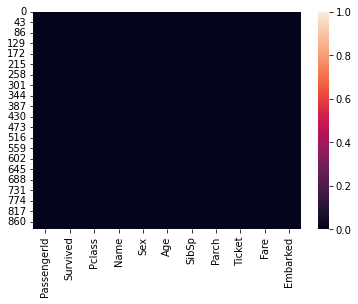

In [20]:
#Ya no hay ninguna columna con valores nulos
sns.heatmap(training_dataframe.isnull())

In [21]:
training_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Borrar las columnas que no son numéricas o no son necesarias para el análisis
training_dataframe.drop(['Name', 'Ticket', "PassengerId"], axis = 1, inplace = True)

In [23]:
training_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
#Convertir la columna sex a numérica
numeric_sex = pd.get_dummies(training_dataframe['Sex'], drop_first = True) # drop_first = True dejar solo 1 columna de la conversión de los datos

In [25]:
#Agregar la nueva columna de los datos numéricos de la columna sex
#Concatenar 2 dataframes (training_dataframe y numeric_sex), axis = 1 para decirle que se va a hacer a nivel de columnas
training_dataframe = pd.concat([training_dataframe, numeric_sex], axis = 1) 

In [26]:
#axis = 1 para decir que se va a hacer a nivel de columnas, inplace = True que lo haga definitivamente
training_dataframe.drop("Sex", axis = 1, inplace = True) 

In [27]:
training_dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [28]:
#Convertir la columna Embarked a numérica
embarked_port = pd.get_dummies(training_dataframe['Embarked'], drop_first = True) #drop_first = True para borrar la primera columna

In [29]:
embarked_port

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
training_dataframe = pd.concat([training_dataframe, embarked_port], axis = 1) 

In [31]:
training_dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [32]:
training_dataframe.drop("Embarked", axis = 1, inplace = True)

In [36]:
training_dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
